In [16]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
# import dataset
data = pd.read_csv('cleaned_car_data.csv')
data.head()

,name,make,year,mileage,transmission,colour,price
0,2000 BUICK CENTURY CUSTOM Sedan 4 Door,BUICK,2000,1.0,AUTOMATIC,CHAMPAGNE,357
1,2004 HONDA CIVIC LX,HONDA,2004,134095.0,AUTOMATIC,GRAY,850
2,1993 FORD MUSTANG LX,FORD,1993,99086.0,AUTOMATIC,WHITE,975
3,1998 HONDA CR-V LX,HONDA,1998,194018.0,AUTOMATIC,BLUE,925
4,1999 CHEVROLET TAHOE K1500 Wagon 4 Door,CHEVROLET,1999,264054.0,AUTOMATIC,GRAY,750


EDA

In [18]:
data.nlargest(5, 'price')

,name,make,year,mileage,transmission,colour,price
5,2004 HONDA CIVIC EX,HONDA,2004,0.0,AUTOMATIC,GRAY,1000
6,2009 DODGE JOURNEY SE Wagon 4 Door,DODGE,2009,216676.0,AUTOMATIC,GREEN,1000
11,2008 HONDA ACCORD EXL,HONDA,2008,265938.0,AUTOMATIC,GRAY,1000
12,1999 FORD EXPLORER,FORD,1999,139990.0,AUTOMATIC,RED,1000
14,2010 DODGE CALIBER SX,DODGE,2010,176531.0,AUTOMATIC,BLACK,1000


In [29]:
data.nlargest(5, 'mileage')

,name,make,year,mileage,transmission,colour,price
1352,1989 BUICK REATTA Coupe,BUICK,1989,415811.0,AUTOMATIC,BLACK,850
1437,1989 BUICK REATTA Coupe,BUICK,1989,415811.0,AUTOMATIC,BLACK,850
19,2005 HONDA ACCORD LX,HONDA,2005,354898.0,AUTOMATIC,BLUE,599
627,2002 GMC YUKON,GMC,2002,348787.0,AUTOMATIC,WHITE,1000
468,1995 CHEVROLET K1500 Club Cab Pickup,CHEVROLET,1995,348540.0,AUTOMATIC,BLUE,800


In [19]:
corr = data.corr()
corr

,year,mileage,price
year,1.000000,-0.097968,0.060512
mileage,-0.097968,1.000000,0.026938
price,0.060512,0.026938,1.000000


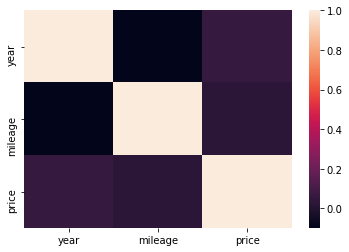

In [20]:
# heat map
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

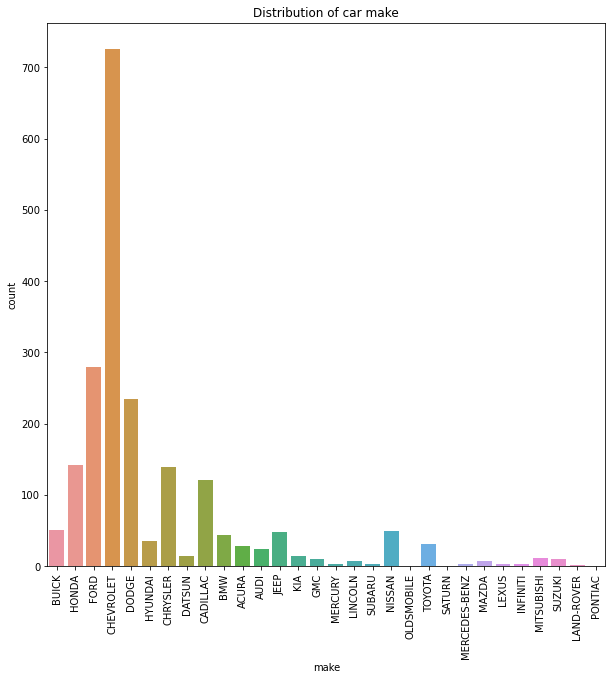

In [41]:
# car make with the highest numbers of cars available
fig = plt.figure(figsize=(10, 10))
sns.countplot(data.make);
plt.title("Distribution of car make")
plt.xticks(rotation=90);

In [22]:
# Categorical variable 
data.make.value_counts()

CHEVROLET        726
FORD             279
DODGE            235
HONDA            142
CHRYSLER         140
CADILLAC         121
BUICK             51
NISSAN            50
JEEP              48
BMW               44
HYUNDAI           35
TOYOTA            32
ACURA             29
AUDI              25
KIA               15
DATSUN            14
MITSUBISHI        12
SUZUKI            10
GMC               10
LINCOLN            8
MAZDA              7
LEXUS              4
SUBARU             3
MERCEDES-BENZ      3
MERCURY            3
INFINITI           3
LAND-ROVER         2
OLDSMOBILE         1
PONTIAC            1
SATURN             1
Name: make, dtype: int64

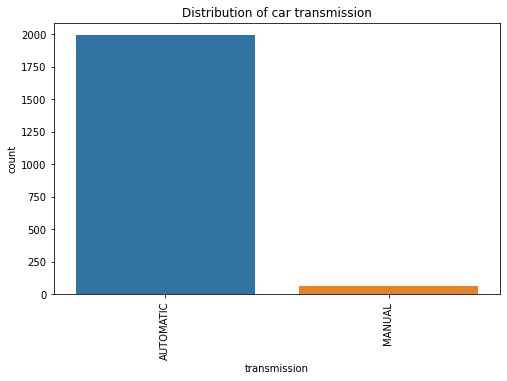

In [23]:
# car make with the highest numbers of cars available
fig = plt.figure(figsize=(8, 5))
sns.countplot(data.transmission);
plt.title("Distribution of car transmission")
plt.xticks(rotation=90);

In [24]:
# Categorical variable 
data.transmission.value_counts()

AUTOMATIC    1991
MANUAL         63
Name: transmission, dtype: int64

In [33]:
# create a pivot table to find the average price per car make
data.pivot_table(values='price', index='make', aggfunc='mean')

,price
make,
ACURA,790.482759
AUDI,750.280000
BMW,836.159091
BUICK,606.196078
CADILLAC,729.132231
CHEVROLET,754.103306
CHRYSLER,686.064286
DATSUN,792.857143
DODGE,817.765957


In [35]:
from wordcloud import WordCloud, STOPWORDS

TypeError: 'numpy.ndarray' object is not callable

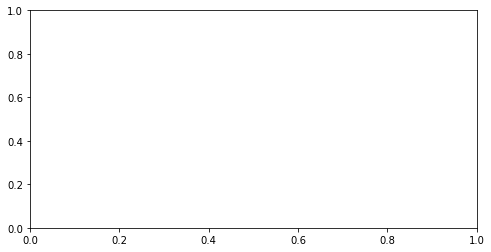

In [50]:
plt.subplots(figsize=(8,4))
text = data['make']
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()